In [7]:
#Add Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
#combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


### Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())
#First, use groupby to create summary stats by drug regime, then add results into columns in summarystats


summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename columns
summarystats = summarystats.rename(columns = {"Mean" : "Mean Tumor Volume", "Median" : "Median Tumor Volume", "Variance" : "Tumor Volume Variance", "Standard Deviation" : "Tumor Volume Std. Dev.", "SEM" : "Tumor Volume Std. Err." })

summarystats.head(10)






,Mouse ID,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


### Bar Plotting

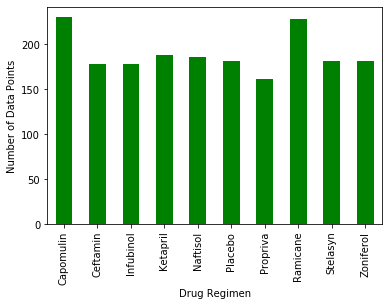

<Figure size 432x288 with 0 Axes>

In [66]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints = summarystats[["Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "g", legend=False)

# Set labels for the chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()


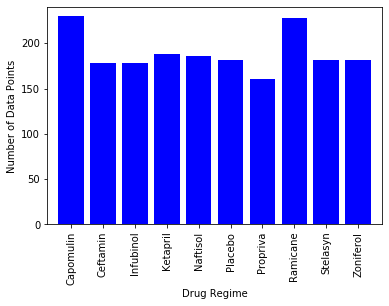

In [69]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Mouse ID"], color = "b", width = .8)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Mouse ID"])+10)

# Set a Title and labels

plt.xlabel("Drug Regime")
plt.ylabel("Number of Data Points")

# Save our graph and show the grap
plt.show()

### Pie Plotting

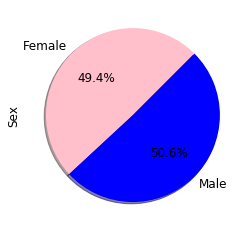

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


#Create a dataframe grouping by the 'Sex' column
gender = combined_data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
combined_gender = pd.DataFrame(gender['Sex'].count())

# View the groupby dataframe
#combined_gender.head()

combined_gender.plot(kind='pie',subplots=True, startangle=45,  autopct='%1.1f%%',shadow=True, fontsize=12, colors =["pink","blue"],legend =False)
plt.show()



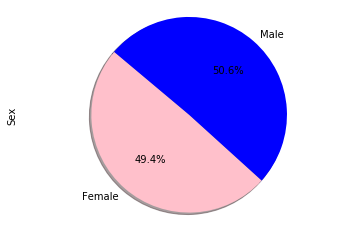

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(combined_gender.index.values)

gender_counts = combined_gender['Sex']

colors = ["pink", "blue"]

# Create the pie chart based upon the values above

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 12

plt.ylabel("Sex")
plt.axis("equal")

plt.show()


### Quartiles, Outliers, and Box Plots

In [115]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


#First create a list of the four drugs to examine
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Using 'isin()' method to filter the original 'combined_data' data frame with drug_list:

four_drugs = combined_data[combined_data['Drug Regimen'].isin(drug_list)]


four_drugs.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [142]:

#Groupby 'Mouse ID' and use the '.agg method' 
#Determine the last value of the 'Tumor Volume (mm3)' column above using a lambda function selecting the element in -1 position

drug_reg_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe

drug_reg_last_tumor



Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [146]:
# Rearrange 'drug_reg_last_tumor' having 'Drug Regimen' as columns by using 'unstack'.
unstack_drlt = drug_reg_last_tumor.stack(level=0).unstack(level=0)
drug_reg_last_tumor.set_index("Last_tumor_size")

#Print
unstack_drlt.head()


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [160]:
#Calculate the IQR and quartiles to determine if there are any potential outliers.

counter = 0

for drug in drug_list:
    quartiles = unstack_drlt[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if counter == 0:
        print(f"--------------------------------------------------------")
        print(f"{drug} IQR data is:")
        print(f"The lower quartile of {drug} is: {lowerq}")
        print(f"The upper quartile of {drug} is: {upperq}")
        print(f"The interquartile range of {drug} is: {iqr}")
        print(f"The the median of {drug} is: {quartiles[0.5]} ")
        print(f"Values below {lower_bound} for {drug} could be outliers.")
        print(f"Values above {upper_bound} for {drug} could be outliers.")

counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [161]:

# First create an empty list
boxplot_list = []

# Loop through the list of the four drugs names using them to select the same column names then append to the boxplot_list
for drug in drug_list:
    boxplot_list.append(list(unstack_drlt[drug].dropna()))

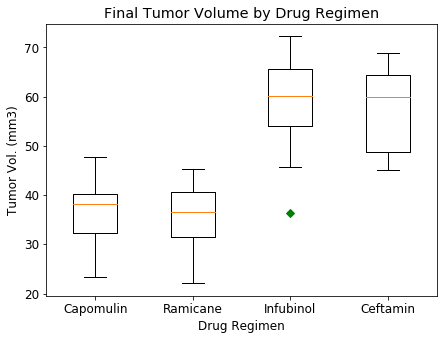

In [168]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots

fig1, ax = plt.subplots(figsize=(7,5))

ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol. (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list,)

plt.show()

### Line and Scatter Plot

In [175]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

capomulin_data.head(500)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


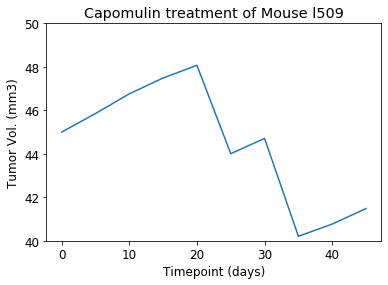

In [182]:
#Mouse analysis
mouse_analysis = combined_data.groupby(["Drug Regimen"])

# merge

capomulin_df = combined_data.loc[ (combined_data["Drug Regimen"] == "Capomulin") ,:]
capomulin_df.head()

capomulin_treated_mouse_df = capomulin_df.loc[ (capomulin_df["Mouse ID"] == "l509") ,:]
capomulin_treated_mouse_df.head()


x_axis = capomulin_treated_mouse_df['Timepoint']
y_axis = capomulin_treated_mouse_df['Tumor Volume (mm3)']
plt.ylim(40, 50)
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Vol. (mm3)')
plt.plot(x_axis, y_axis)

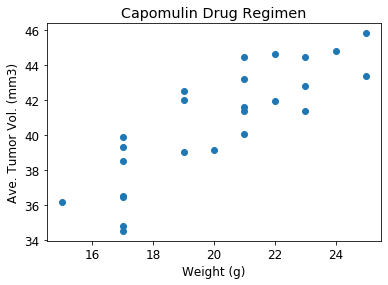

In [185]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_axis = capomulin_df.groupby('Mouse ID').mean()['Weight (g)']
y_axis = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

x = x_axis
y = y_axis
plt.title('Capomulin Drug Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Ave. Tumor Vol. (mm3)')
plt.scatter(x, y)

### Correlation Coefficient

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation factor is 0.84
y = 0.95x + 21.55


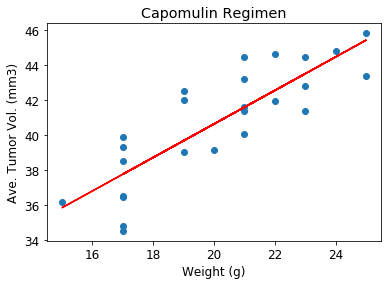

In [192]:
#Calculate Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")


x_axis = capomulin_df.groupby('Mouse ID').mean()['Weight (g)']
y_axis = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

x_values = x_axis
y_values = y_axis

# Plot chart with the analyses

plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Ave. Tumor Vol. (mm3)')

regress_values = x * slope + intercept
line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 30), fontsize=15, color='red')


plt.show()

# General Observations: